In [1]:
#Import necessary libraries

from IPython.display import clear_output, display, HTML
from ipywidgets import interact, interactive
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import integrate
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
import scipy.stats as stats
from sklearn.decomposition import PCA
import ipywidgets as widgets

/Users/hazirahhm/.local/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Watch this to help you with executing your first Python code!
HTML('<iframe width="806" height="504" src="https://www.youtube.com/embed/9w_EV8UPuxY" title="Anaconda Installation and Interactive Jupyter Notebook using Binder" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

/Users/anaconda3/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# **STARTER - EMERGING (E1 + E2)**
## OBJECTIVE : BY THE END OF THIS LESSON YOU SHOULD BE ABLE TO :
## - Execute a cell
### Click the first cell and press **'<u>SHIFT + ENTER<u>'** and see what happens!
### At this stage, you don't have to worry about what the code does. The main aim is to show you what Python can do and the technical aspects of executing code. 
- Explore Random Graphs Using NetworkX
In this example, we build a simple user interface (UI) for exploring random graphs with NetworkX (A Python Library used for creating, manipulating and studying complex networks of nodes and edges).

In [3]:
# Watch this to help you with executing your first Python code!
HTML('<iframe width="806" height="504" src="https://www.youtube.com/embed/shweGBSyB4A" title="Starter Activity for Python Programming Training" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

## 1. PYTHON USAGE IN GENERATING GRAPHS
---
## Random lobster, Powerlaw cluster, Erdős-Rényi, Newman-Watts-Strogatz small-world

Information on the 4 Documentations 
* https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.random_lobster.html
* https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.powerlaw_cluster_graph.html
* https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html
* https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.newman_watts_strogatz_graph.html


In [4]:
# This script defines functions to generate and plot various types of random graphs using 
# NetworkX and Matplotlib, including: random lobster, powerlaw cluster, Erdős-Rényi, Newman-Watts-Strogatz small-world, 
# and a plotting function.

def random_lobster(n, m, k, p):
    return nx.random_lobster(n, p, p / m)

def powerlaw_cluster(n, m, k, p):
    return nx.powerlaw_cluster_graph(n, m, p)

def erdos_renyi(n, m, k, p):
    return nx.erdos_renyi_graph(n, p)

def newman_watts_strogatz(n, m, k, p):
    return nx.newman_watts_strogatz_graph(n, k, p)

def plot_random_graph(n, m, k, p, generator):
    g = generator(n, m, k, p)
    nx.draw(g)
    plt.show()

In [5]:
# Interactive function call using `interact` to plot random graphs based on user-defined parameters,
# allowing selection from various generators: lobster, power law, Newman-Watts-Strogatz, and Erdős-Rényi.

interact(plot_random_graph, n=(2,30), m=(1,10), k=(1,10), p=(0.0, 0.99, 0.001),
         generator=[
             ('lobster', random_lobster),
             ('power law', powerlaw_cluster),
             ('Newman-Watts-Strogatz', newman_watts_strogatz),
             (u'Erdős-Rényi', erdos_renyi),
         ]);

interactive(children=(IntSlider(value=16, description='n', max=30, min=2), IntSlider(value=5, description='m',…

## 2. PYTHON USAGE IN VISUALISATION
---
## Projectile Motions of an object

In [6]:
# Define initial conditions
initial_velocity = 20  # initial velocity in m/s
angle_degrees = 45  # launch angle in degrees
gravity = 9.81  # acceleration due to gravity in m/s^2

# Convert angle to radians
angle_radians = np.radians(angle_degrees)

# Calculate initial velocity components
initial_velocity_x = initial_velocity * math.cos(angle_radians)
initial_velocity_y = initial_velocity * math.sin(angle_radians)

# Print the results
print("Initial velocity components:")
print("Vx:", initial_velocity_x, "m/s")
print("Vy:", initial_velocity_y, "m/s")

Initial velocity components:
Vx: 14.142135623730951 m/s
Vy: 14.14213562373095 m/s


In [7]:
# Define time variables
time_interval = 0.1  # time interval in seconds
total_time = 2 * initial_velocity_y / gravity  # total flight time

# Create lists to store trajectory data
time_points = []
x_positions = []
y_positions = []

# Calculate trajectory
t = 0
while t <= total_time:
    x = initial_velocity_x * t
    y = initial_velocity_y * t - 0.5 * gravity * t**2
    time_points.append(t)
    x_positions.append(x)
    y_positions.append(y)
    t += time_interval

# Print trajectory data
print("Time points:", time_points)
print("X positions:", x_positions)
print("Y positions:", y_positions)

Time points: [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001]
X positions: [0.0, 1.4142135623730951, 2.8284271247461903, 4.242640687119286, 5.656854249492381, 7.0710678118654755, 8.48528137423857, 9.899494936611665, 11.31370849898476, 12.727922061357855, 14.14213562373095, 15.556349186104045, 16.97056274847714, 18.38477631085024, 19.798989873223334, 21.21320343559643, 22.627416997969526, 24.04163056034262, 25.455844122715718, 26.870057685088813, 28.28427124746191, 29.698484809835005, 31.1126983722081, 32.5269119345812, 33.94112549695429, 35.35533905932739, 36.769552621700484, 38.18376618407358, 39.5979

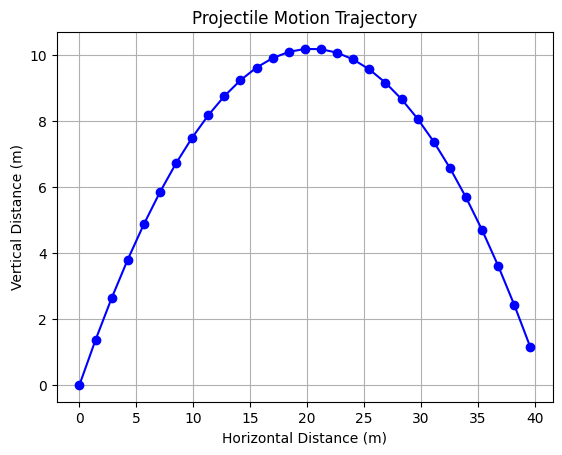

In [8]:
# Plot the trajectory
plt.plot(x_positions, y_positions, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Vertical Distance (m)')
plt.title('Projectile Motion Trajectory')
plt.grid(True)

# Show the plot
plt.show()

## 3. PYTHON USAGE IN CALCULATING AND VISUALISING TRAJECTORIES
---
## Exploring the Lorenz System of Differential Equations

### The Lorenz equations can arise in simplified models for lasers, dynamos, thermosyphons,brushless DC motors, electric circuits, chemical reactions and forward osmosis.
### For more information about this please go to https://en.wikipedia.org/wiki/Lorenz_system

In [9]:
def solve_lorenz(N=10, angle=0.0, max_time=4.0, sigma=10.0, beta=8./3, rho=28.0):

    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1], projection='3d')
    ax.axis('off')

    # prepare the axes limits
    ax.set_xlim((-25, 25))
    ax.set_ylim((-35, 35))
    ax.set_zlim((5, 55))
    
    def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
        """Compute the time-derivative of a Lorenz system."""
        x, y, z = x_y_z
        return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

    # Choose random starting points, uniformly distributed from -15 to 15
    np.random.seed(1)
    x0 = -15 + 30 * np.random.random((N, 3))

    # Solve for the trajectories
    t = np.linspace(0, max_time, int(250*max_time))
    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0i, t)
                      for x0i in x0])
    
    # choose a different color for each trajectory
    colors = plt.cm.viridis(np.linspace(0, 1, N))

    for i in range(N):
        x, y, z = x_t[i,:,:].T
        lines = ax.plot(x, y, z, '-', c=colors[i])
        plt.setp(lines, linewidth=2)

    ax.view_init(30, angle)
    plt.show()

    return t, x_t

In [10]:
w = interactive(solve_lorenz, angle=(0.,360.), max_time=(0.1, 4.0), 
                N=(0,50), sigma=(0.0,50.0), rho=(0.0,50.0))
display(w)

interactive(children=(IntSlider(value=10, description='N', max=50), FloatSlider(value=0.0, description='angle'…

# 3. PYTHON USAGE IN DATA VISUALISATION
---
## Scatter plot of Wine data set
In the example below, we are loading and plotting the famous wine data set that describes wine samples through a number of measurements including alcohol content, magnesium levels, color, etc.

In [11]:
wine = load_wine()
wine = wine.data

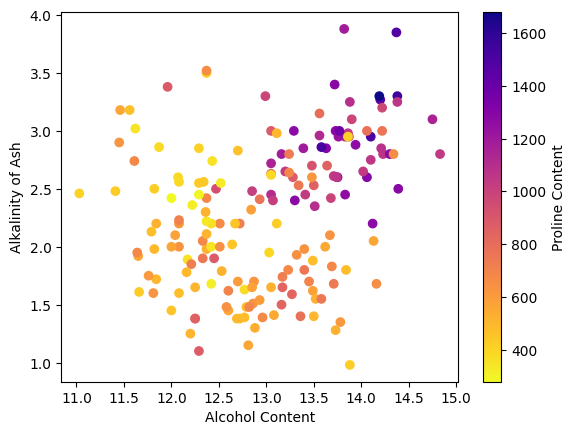

In [12]:
# In the example above, the alcohol content is represented on the x-axis, the alkalinity is represented on the y-axis, 
# and the proline content is shown using the color of the markers.

plt.scatter(wine[:,0], wine[:,5], c=wine[:,12], cmap='plasma_r')
plt.xlabel('Alcohol Content')
plt.ylabel('Alkalinity of Ash')

cbar = plt.colorbar()
cbar.set_label('Proline Content');

# 4. PYTHON USAGE IN DATA VISUALISATION
---
## Boxplot
We can make boxplots for every variable. This kind of plot allows us to look for outliers. Let's remember what a boxplot is: A boxplot is a one-dimensional plot that will show all the values in the dataset for a variable, specifying the minimun and maximun values on the borders, and the first, second (median), and third quartiles on the inside of the box.
In seaborn, boxplots can be oriented vertically or horizontally using the paramenter `orient`, by specifying its values "v" (for vertical), and "h" (for horizontal).

In [13]:
df_wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


(0.0, 300.0, 11.5, -0.5)

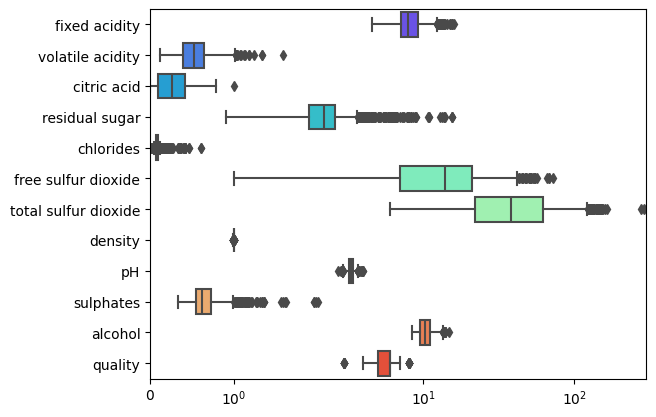

In [14]:
ax = sns.boxplot(data=df_wine, orient="h", palette="rainbow")
ax.set_xscale('symlog') #Using logarithmic scale
ax.axis(xmin=0, xmax=300)

As we can see, the means of the data vary a lot. This happens because the data is on different scales, meaning that different units are used to measure the different features. It is possible to **rescale the data**, which means centering the means of the data. A common method is to standardize variables by subtracting the mean and dividing by the variance, thus making $\mu=0$ and $\sigma=1$ . Scikit-learn has a module for preprocessing and we will use it in the next example. 

For more information, please visit  [Scikit-learns's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 'Standard Scaler')

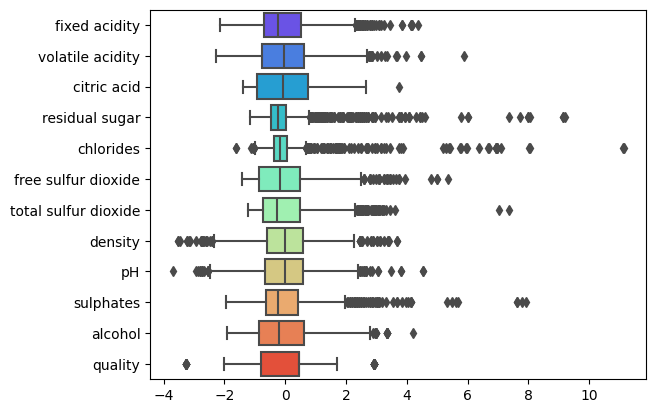

In [15]:
scaled = StandardScaler().fit_transform(df_wine)
df_scaled = pd.DataFrame(data=scaled, columns=df_wine.columns)
ax = sns.boxplot(data=df_scaled, orient="h", palette="rainbow")

Another way to visualize the boxplots is as a grid. In this case, we use a function of the Pandas library called `plot()`.

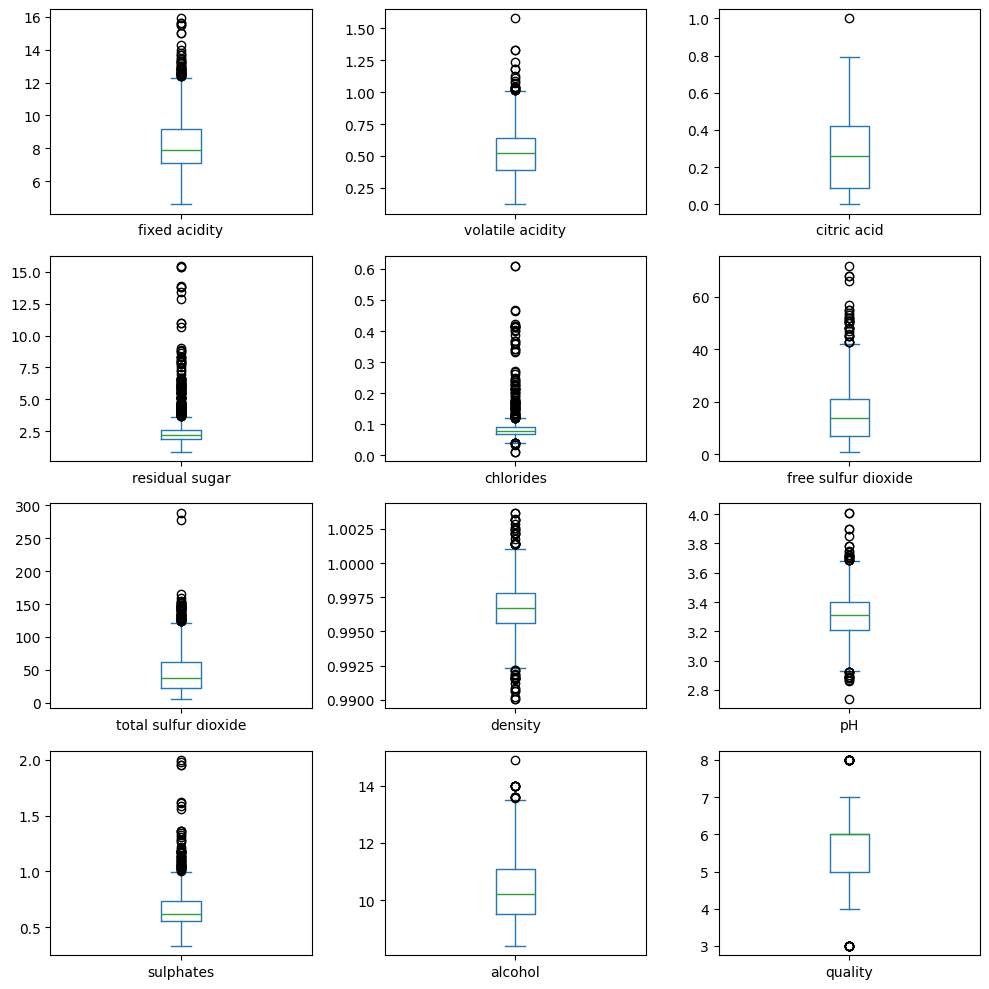

In [16]:
df_wine.plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))
plt.tight_layout()

# 5. PYTHON USAGE IN DATA VISUALISATION
---
## Correlation analysis
Another important aspect to understand our data is to study the correlation between variables.If we want to see the correlation between pH and fixed acidity, we can make this scatter plot and marginal histograms using `sns.jointplot`

/Users/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.1, 0.9, '$\\rho = -0.683, p = 0.000$')

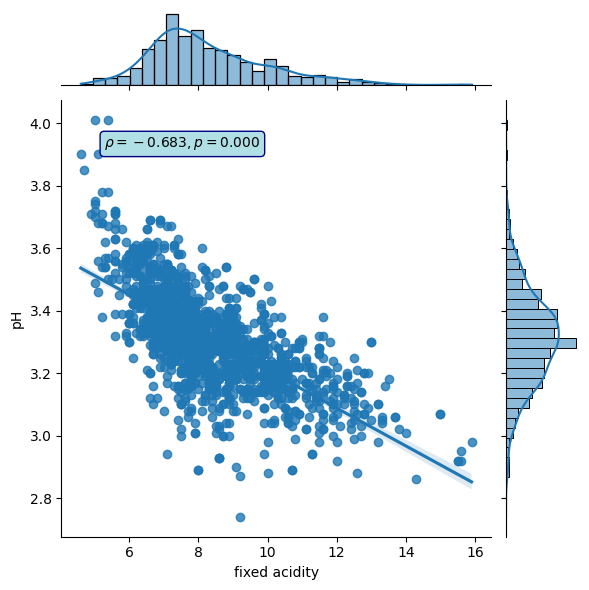

In [17]:
joint_plt = sns.jointplot(y='pH', x='fixed acidity', data=df_wine, kind='reg',)

r, p = stats.pearsonr(df_wine['fixed acidity'], df_wine['pH'])
joint_plt.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})

In [18]:
def get_corr(col1, col2, temp_df):
    pearson_corr, p_value = pearsonr(temp_df[col1], temp_df[col2])
    print("Correlation between {} and {} is {:.2f}".format(col1, col2, pearson_corr))
    print("P-value of this correlation is {}".format(p_value))
get_corr('fixed acidity', 'pH', df_wine)

Correlation between fixed acidity and pH is -0.68
P-value of this correlation is 4.063034039843752e-220


# 6. PYTHON USAGE IN DATA VISUALISATION
---
## Heatmap (Red Wine Contents)
### We can create a DataFrame with this parameter for each pair of columns (using the _df.corr()_ function) 
### then, use matplot and seaborn to create a _heatmap_ of the correlation coefficients.

<Axes: >

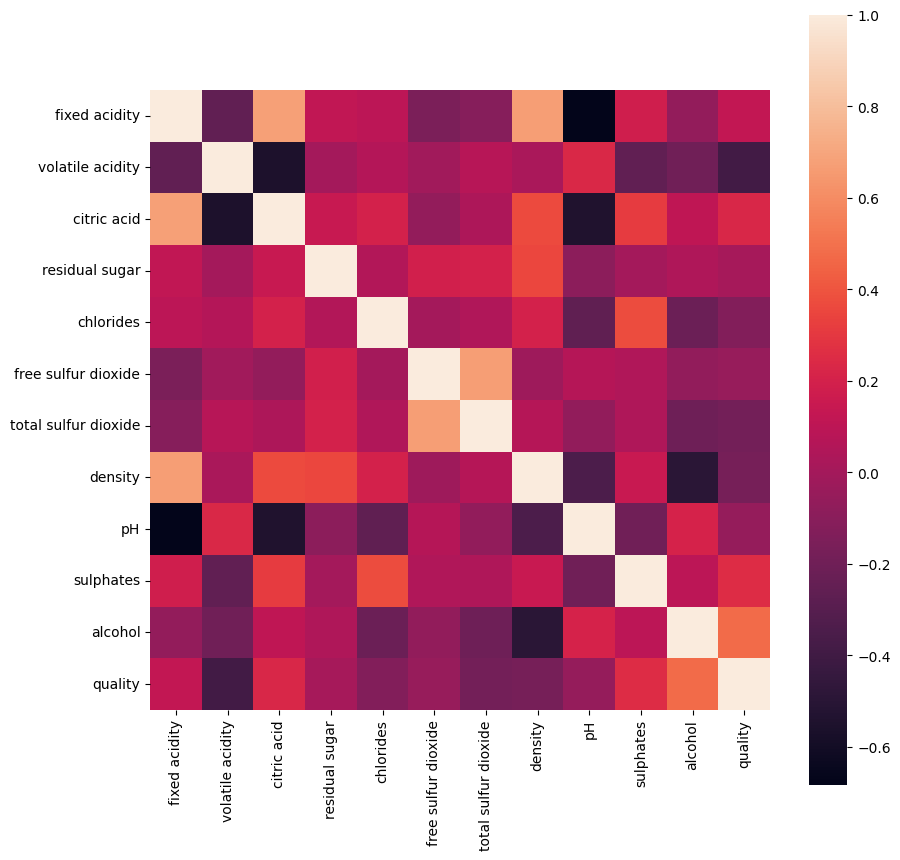

In [19]:
# We calculate correlation with Pearson's coefficient using Pandas:
correlation = df_wine.corr(method='pearson')
# We create a new figure using matplotlib and set the figure size:
fig=plt.gcf()
fig.set_size_inches(10,10)
# Heatmap of the correlation using Seaborn:
sns.heatmap(correlation, annot=False,square=True)

/Users/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

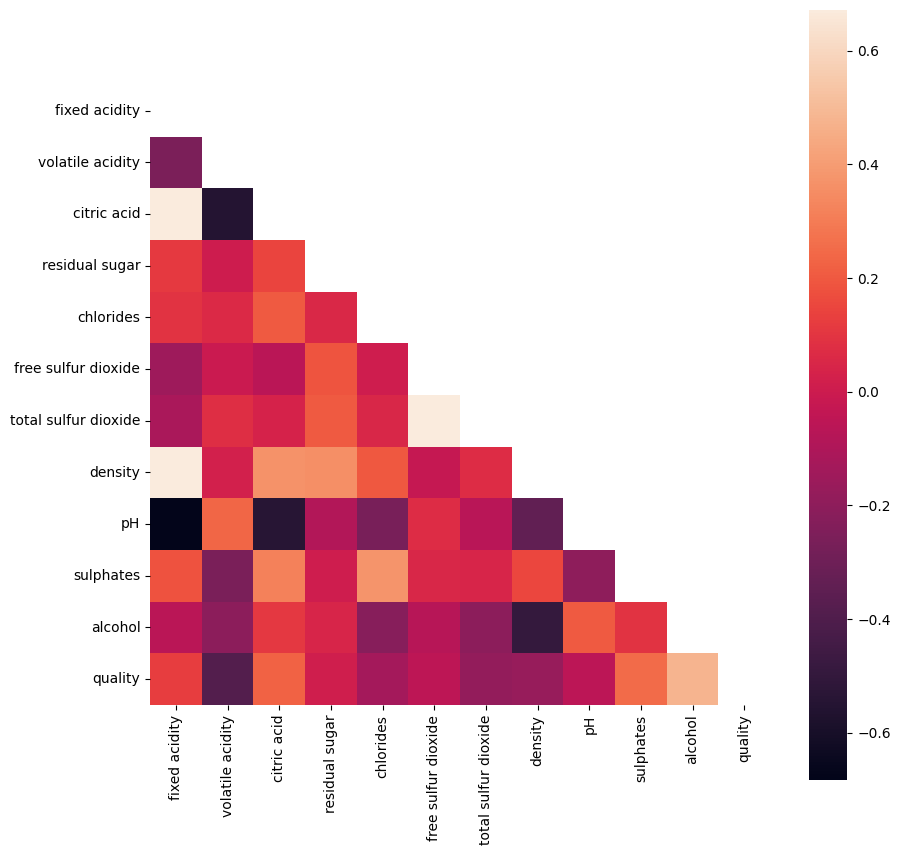

In [20]:
correlation = df_wine.corr()
# np.triu is a numpy function that  takes 2d-numpy array as input and gives the upper triangle of the array
mask_triu = np.triu(correlation)
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask_triu,square=True,annot=True, annot_kws={"size":9})

# 7. PYTHON USAGE IN DATA VISUALISATION
---
## Pairplot

/Users/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

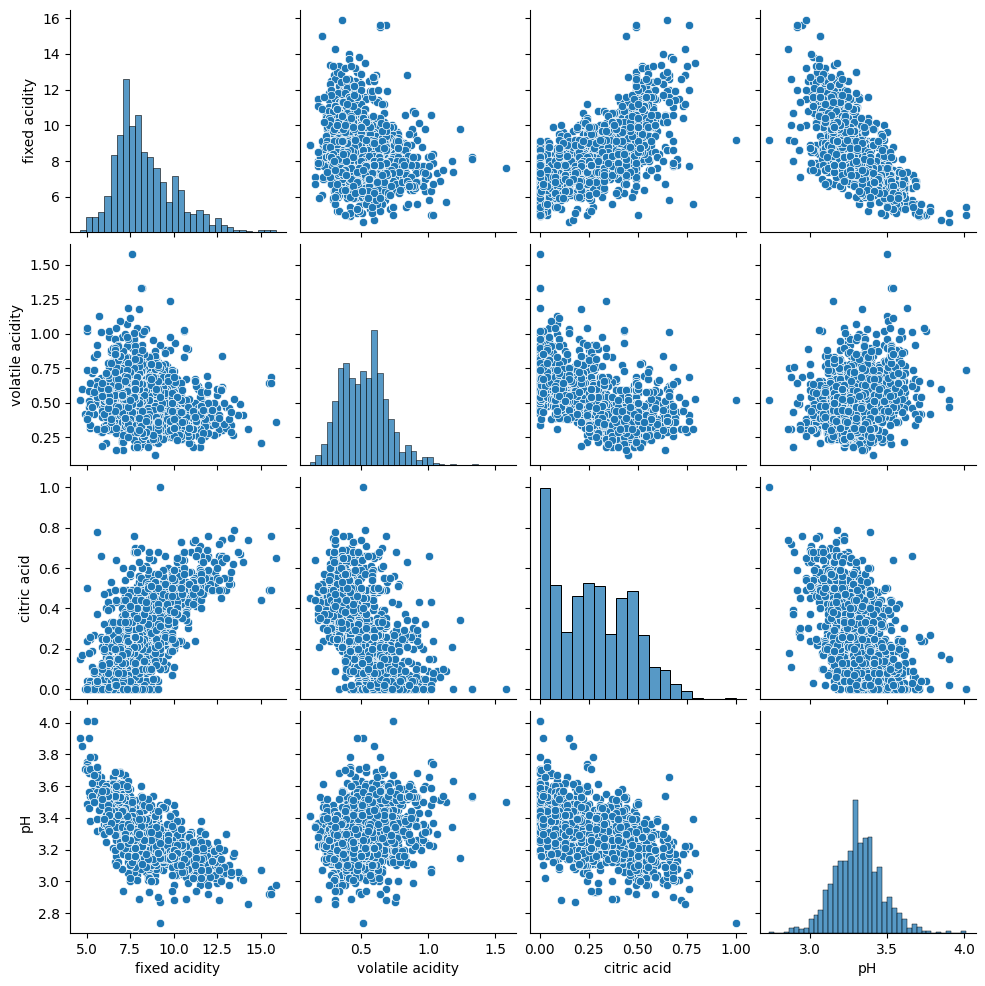

In [21]:
sns.pairplot(df_wine[['fixed acidity','volatile acidity','citric acid', 'pH']], corner=False) #corner=True hides the upper portion of the matrix

# 8. PYTHON USAGE IN DATA VISUALISATION
---
## Variable reduction - Principal Component Analysis (PCA)

In [22]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=";")
df['hue']='red'
df2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=";")
df2['hue']='white'
df_wine_2 = pd.concat([df, df2], ignore_index=True)

In [23]:
data_pca = df_wine_2.copy()
data_pca = data_pca.drop(labels = ['quality', 'hue'],axis = 1)
#What StandardScaler() does is scaling the data. The fit.transform() module fits these new values to the data, 
#and stores them, replacing the old values.
data_pca = StandardScaler().fit_transform(data_pca)
#Apply PCA on the transformed (scaled and centered) data:
pca = PCA(n_components=3)
pca_results = pca.fit_transform(data_pca)

<Axes: title={'center': '2 Component PCA'}, xlabel='Component 1', ylabel='Component 2'>

<Figure size 640x480 with 0 Axes>

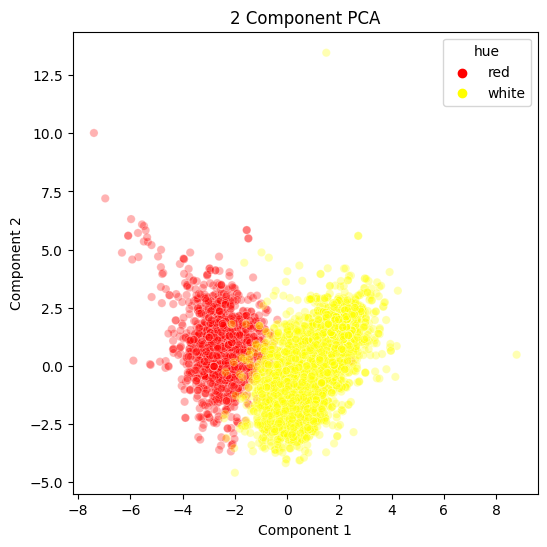

In [24]:
pca_dataset = pd.DataFrame(data = pca_results, columns = ['component1', 'component2','component3'] )
pca_dataset['hue']=df_wine_2['hue']
plt.figure()
plt.figure(figsize=(6,6))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('2 Component PCA')
sns.scatterplot(x = pca_dataset['component1'], y = pca_dataset['component2'], hue=pca_dataset['hue'],
                alpha=0.3,palette=["red", "yellow"])

# **EMERGING (E2)**
## OBJECTIVE : BY THE END OF THIS LESSON YOU SHOULD BE ABLE TO :
### - Create and execute your first cell
### - Identify types of cells
---
## Types of cells

**Code Cells**

Contents in this cell are treated as statements in a programming language of current kernel. Default kernel is Python. So, we can write Python statements in a code cell. When such cell is run, its result is displayed in an output cell. The output may be text, image, matplotlib plots or HTML tables. Code cells have rich text capability.

**Markdown Cells**

These cells contain text formatted using markdown language. All kinds of formatting features are available like making text bold and italic, displaying ordered or unordered list, rendering tabular contents etc. Markdown cells are especially useful to provide documentation to the computational process of the notebook.

**Raw Cells**

Contents in raw cells are not evaluated by notebook kernel. When passed through nbconvert, they will be rendered as desired. If you type LatEx in a raw cell, rendering will happen after nbconvert is applied.

In [25]:
from IPython.display import clear_output, display, HTML
# Watch this to help you with executing your first Python code!
HTML('<iframe width="790" height="494" src="https://www.youtube.com/embed/NuArp_htMKU" title="Emerging Level (E2) level Python Programming Training" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

/Users/anaconda3/lib/python3.11/site-packages/IPython/core/display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [26]:
# An example of a CODE cell
print ("Hello!")

Hello!


An example of a **MARKDOWN** cell
- Create your first code!

In [27]:
#Task E2.1 - # Create you own code cell here

In [28]:
#Task E2.2 - # Create you own markdown cell here

In [29]:
#Task E2.3 - # Create your own raw cell here

# **EMERGING (E3)**
## OBJECTIVE : BY THE END OF THIS LESSON YOU SHOULD BE ABLE TO :
### - Use print() function
### - Use type() function to identify data type
### - Create Variables
### - Basic Applications
---

In [30]:
from IPython.display import clear_output, display, HTML
# Watch this to help you with executing your first Python code!

HTML('<iframe width="806" height="504" src="https://www.youtube.com/embed/_v0Q9E5l2R8" title="Emerging Level (E3) Part 1 Python Programming Training" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

## **Using print () function**

In [31]:
# Using print () command to print text. 
# in Python, print means 'show on screen' not 'send to the printer'!
# Method 1

print("Hello, I am learning Python today!")

Hello, I am learning Python today!


In [32]:
# Using print () command to print text.
# Method 2
print('Hello, I am learning Python today!')

Hello, I am learning Python today!


In [37]:
#Task E2.4 - Create your first code! 
#Print your name below and execute it!

In [34]:
#Task E2.5 - Write 2 codes that will print a question and an answer.


In [35]:
# Task E2.6 - Execute the cell below and answer the quiz.

out = widgets.Output()

alternativ = widgets.RadioButtons(
    options=[('Print ("I am learning ")', 1), ('print ("Hello world!")', 2), ('print (Hello world!)', 3),('print "Hello world!"', 4)],
    description='',
    disabled=False
)
print('\033[1m','1) Which of these lines of code is correct?','\033[0m')
check = widgets.Button(description="Check your answer!")
display(alternativ)
display(check)


def quiz_1(b):
        a = int(alternativ.value)
        right_answer = 2
        if(a==right_answer): 
            color = '\x1b[6;30;42m' + "Correct!" + '\x1b[0m' +"\n" #green color
        else:
            color = '\x1b[5;30;41m' + "You can try again! " + '\x1b[0m' +"\n" #red color
        svar = ["","","",""] 
        with out:
            clear_output()
        with out:
            print(color+""+svar[a-1])   
        
        
display(out)
check.on_click(quiz_1)

 1) Which of these lines of code is correct? 


RadioButtons(options=(('Print ("I am learning ")', 1), ('print ("Hello world!")', 2), ('print (Hello world!)',…

Button(description='Check your answer!', style=ButtonStyle())

Output()

In [36]:
# Task E2.7 - The code below return an error . Correct it and execute!
print ("Hello, World!)

SyntaxError: unterminated string literal (detected at line 2) (262128408.py, line 2)

In [ ]:
# Task E2.8 - The code below return an error . Correct it and execute!
print ("Hello, World!')

In [ ]:
# Task E2.9 - The code below return an error . Correct it and execute!
print (Hello, World!)

# **EMERGING (E3)**
## OBJECTIVE : BY THE END OF THIS LESSON YOU SHOULD BE ABLE TO :
### - Use print() function
### - Use type() function to identify data type
### - Create Variables
### - Basic Applications
---

## **Using type() function to identify data type**

In Python there are specific types of values that we can use. In this notebook we will present "int", "float", "str", "list" and "boolean" values:

*   Boolean (bool): is a variable that can be either _True_ or _False_.

*   String (str):  represents textual data enclosed in either single quotes (‘’) or double quotes (“”)

*   Integer (int): represents positive or negative whole numbers like 8 or -678.

*   Floating point number (float): represents real numbers like 3.14159 or -6.5.

*   Character string (called “string”, str): are strings of characters, meaning they are text values, for example: "hello" or "banana".

*   List (list) : this type of value is a list of either integer or float values, for example: [1,2,3,4] or [1.23, 2, 3.54, 4]


For more information, please visit the [documentation](https://docs.python.org/3/library/stdtypes.html "Python's Built-in Types").

We can check the type of data with: **type( )** and the variable name, like this:

In [38]:
# Watch this to help you with executing your first Python code!

HTML('<iframe width="806" height="504" src="https://www.youtube.com/embed/ffIM_HuM7RY" title="Emerging Level (E3) Part 2 Python Programming Training" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

In [39]:
# Below are examples of variables which conatin different types of data
# First we define the variables
#Execute this cell!

x = 100

y = "Electrons"

planet = 'Earth'

is_metal = False

pi = 3.14

nobel_gases_list = ["Helium", "Neon", "Argon", "Krypton", "Xenon", "Argon"]

nobel_gases_tuple = ("Helium", "Neon", "Argon", "Krypton", "Xenon", "Argon")

In [40]:
# Identify the data types above
type(x)

int

In [41]:
# Identify the data type for 'y'
type(y)

str

In [42]:
# Identify the data type for 'name'
type(planet)

str

In [43]:
# Identify the data type for 'name'
type(pi)

float

In [44]:
# Identify the data type for 'is_metal'
type(is_metal)

bool

In [45]:
# Identify the data type for 'nobel_gases'
type(nobel_gases_list)

list

In [46]:
# Identify the data type for 'nobel_gases'
type(nobel_gases_tuple)

tuple

# Note: Key Difference Between List and Tuple
* Both lists and tuples are used for storing objects in python. 
* They seem similar, but there are specific differences in their use case. 
* Objects that are stored in lists and tuples can be of any type. 
* The main difference between tuples and lists is that tuples can't be changed after they're created, 
* but lists can be modified. Tuples use less memory than lists. 
* They are also a bit faster, especially when you're just looking up values. 
* So, if you have data that you don't want to change, it's better to use tuples instead of lists.

In [47]:
# Task E3.1 - Identify the data type of each variable
info_1 = 10
info_2 = 9.81
info_3 = "Newton"
info_4 = False
info_5 = ["Iron", "Copper", "Aluminium", "Gold", "Silver", "Platinum", "Zinc"]
info_6 = ("Jupiter", "Neptune", "Venus", "Earth", "Mercury", "Mars", "Saturn", "Uranus") 

In [48]:
#Answer for info_1

In [49]:
#Answer for info_2

In [50]:
#Answer for info_3

In [51]:
#Answer for info_4

In [52]:
#Answer for info_5

In [53]:
#Answer for info_6

# **EMERGING (E3)**
## OBJECTIVE : BY THE END OF THIS LESSON YOU SHOULD BE ABLE TO :
### - Use print() function
### - Use type() function to identify data type
### - Create Variables
### - Basic Applications
---

In [54]:
# Watch this to help you with executing your first Python code!

HTML('<iframe width="806" height="504" src="https://www.youtube.com/embed/AMCOD66_P3s" title="Emerging (E3) - Part 3 Python Programming Training" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

## Creating variables
### In Python,you will work with variables a lot. **Variables** are places for storing data values. 
### Each **variable** has a unique name. Examples are shown below:

In [55]:
# You can assign values to different variables as shown below:

a = 100

e = "Electrons"

is_metal = True

pi = 3.14

In [56]:
# Now we try to print all of them!
print(a)

100


In [57]:
print(e)

Electrons


In [58]:
print (pi)

3.14


In [59]:
print(is_metal)

True


# **INTRODUCTORY - EMERGING (E3)**
## OBJECTIVE : BY THE END OF THIS LESSON YOU SHOULD BE ABLE TO :
### - Use print() function
### - Use type() function to identify data type
### - Create Variables
### - Basic Applications
---

## Basic Physics Applications - Example 1
---
### Calculate the speed of a car travelling at a constant speed in 2 hours and covered 200 km distance.
### Speed = Distance / Time
## **In Python, we use "+" to Add , "-" to Subtract, "*" to Multiply, "/" to Divide**

In [60]:
# Create variables for distance (d) and time (t)

d = 200 #km
t = 2 #hours

# Calculation of the speed
speed = d/t

In [61]:
# Can use 'print(speed)' or simply type 'speed' to see the result
speed

100.0

## Basic Chemistry Application - Example 2
---
### Calculate the molecular mass of water (H2O) 
### Molecular mass of water is given by the formula , 
### Hydrogen(H) + Hydrogen + Oxygen --> 2 x H x O

## **In Python, we use "+" to add , "-" to subtract, "*" to multiply, "/" to divide**

In [62]:
# Create variables for hydrogen (h) and oxygen (o)

h = 1.008 #g/mol
o = 16.00 #g/mol

molecular_mass = 2 * h + o # * means multiply

In [63]:
# Can use 'print(molecular_mass)' or simply type 'molecular_mass' to see the result
molecular_mass

18.016

## Basic Physics Applications - Example 3
---
### Task E3.2 - Now create a code that calculate the current , i (in Amperes) of an unknown gas using the Ideal Gas Law
### Given voltage, v = 24 volts and resistance, r =  6 ohms
### Use Ohm's law : v = ir
### So, to find current , use i = v/r

## **In Python, we use "+" to Add , "-" to Subtract, "*" to Multiply, "/" to Divide**

In [64]:
#Answer

## Basic Chemistry Applications - Example 4
---
### Task E3.3 - Next, create a code that calculates the pressure, P (in Pascals) using the formula
### PV = nRT
### To find pressure , use P = (n * R * T)/v
### Given that the values of n , R, T and v are :
### n = 1 (number of moles)
### R = 8.314 (Ideal gas constant in (JmolK))
### T = 298 (temperature in Kelvin)

In [65]:
#Answer

# ASSESSMENT 1 - MENTIMETER FOR EMERGING LEVEL
## Please enter the quiz to self-check whether you are good to go to the next level!

## https://www.menti.com/al536yddzs2a